170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3387 - loss: 1.7878 - val_accuracy: 0.5508 - val_loss: 1.2620
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5387 - loss: 1.2996 - val_accuracy: 0.6170 - val_loss: 1.1045
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.5879 - loss: 1.1671 - val_accuracy: 0.6498 - val_loss: 1.0188


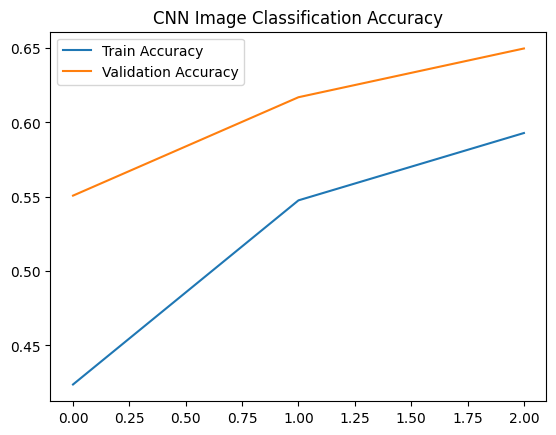

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6533 - loss: 1.0157
Test Accuracy: 0.6498000025749207


In [2]:
# Image Classification using CNN (CIFAR-10)

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model (FAST)
history = model.fit(
    X_train, y_train,
    epochs=3,
    validation_data=(X_test, y_test)
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Image Classification Accuracy")
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
